# Predict which workers will  earn over 50K per month

# Load and take a look at the data

In [2]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data
ds=pd.read_csv('Above 50K.csv')

In [4]:
ds.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,">50K, <=50K"
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
ds.shape

(32561, 15)

In [6]:
ds.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
>50K, <=50K       object
dtype: object

# Check and treat null values

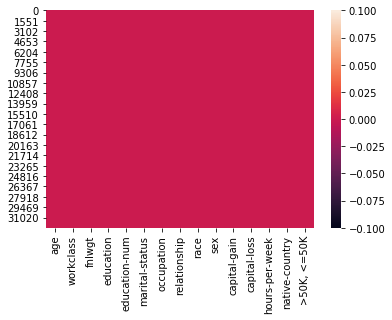

In [7]:
sns.heatmap(ds.isnull())

No null values, but there are unknown values in the dataset.

In [8]:
ds.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
>50K, <=50K       0
dtype: int64

# Clean data

I tried to remove the rows with the unknown values in multiple ways.
I also tried replacing values in the columns with the most common values in the columns.
Though the commands ran successfully none of them actually reflected in the dataset. I know these commands were valid because they have been successful in other assignments.

I then cleanded the dataset by filtering and removing the rows that contained ? in rows in a duplicate csv file in Excel.

In [9]:
# Load manually cleaned duplicate data
cleands=pd.read_csv('adult_cleaned.data.csv')

In [10]:
cleands.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,">50K, <=50K"
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
cleands.shape

(30162, 15)

# Check correlation

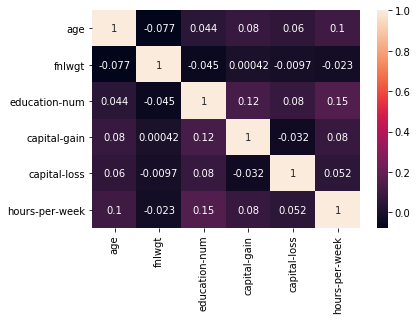

In [12]:
dscor=cleands.corr()
sns.heatmap(dscor, annot=True)

Cannot see correlation to the target column yet, will recheck after encoding.

# Summary statistics

In [13]:
cleands.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The fnlwgt and capitol loss columns have very large standard deviations.

Capitol gain's and capitol loss's standard deviations are too big. Consider dropping the columns.

# Data visualizations

In [14]:
cleands.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       '>50K, <=50K'],
      dtype='object')

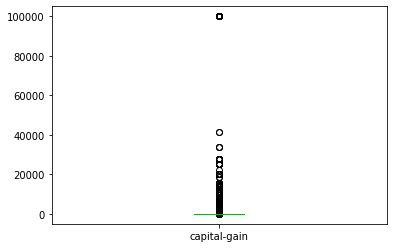

In [15]:
# Check for outliers
cleands['capital-gain'].plot.box()

Definite outlier present.

There are outliers present, need to remove it later.

In [16]:
# Show the country counts
cleands.groupby('native-country')['native-country'].count()

native-country
 Cambodia                         18
 Canada                          107
 China                            68
 Columbia                         56
 Cuba                             92
 Dominican-Republic               67
 Ecuador                          27
 El-Salvador                     100
 England                          86
 France                           27
 Germany                         128
 Greece                           29
 Guatemala                        63
 Haiti                            42
 Holand-Netherlands                1
 Honduras                         12
 Hong                             19
 Hungary                          13
 India                           100
 Iran                             42
 Ireland                          24
 Italy                            68
 Jamaica                          80
 Japan                            59
 Laos                             17
 Mexico                          610
 Nicaragua             

In [17]:
# Show the counts for above and below 50K  per year
cleands.groupby('>50K, <=50K')['>50K, <=50K'].count()

>50K, <=50K
 <=50K    22654
 >50K      7508
Name: >50K, <=50K, dtype: int64

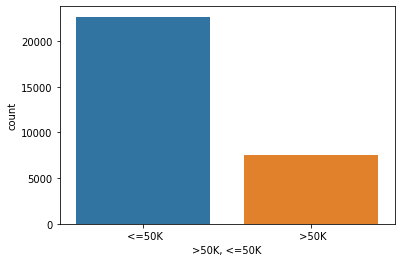

In [18]:
# Show the counts for above and below 50K  per year
sns.countplot(cleands['>50K, <=50K'])

The ratio of people earning more than 50K per year to less is roughly 1:3

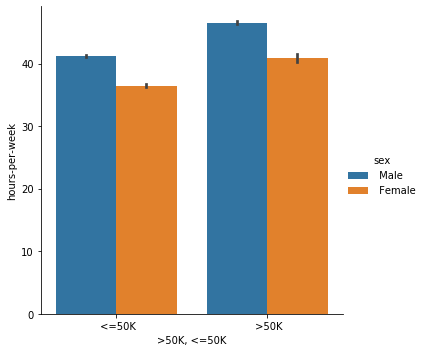

In [19]:
# Show hours worked per week for people earning more or less than 50K per year by sex
sns.catplot(x='>50K, <=50K', y= 'hours-per-week', hue='sex', data=cleands, kind='bar')

Men work more hours per week than women no matter what their income is per month. Also people who earn more than 50K per year work more hours per week than people who earn less than 50K per year.

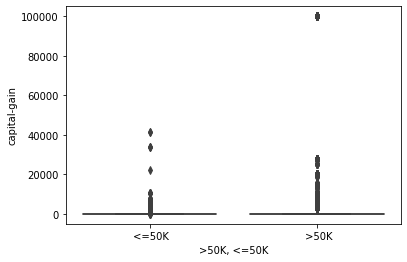

In [20]:
# Show distribution of capitol gain for earnings above and below 50K a year
sns.boxplot(x='>50K, <=50K',y='capital-gain',data=cleands)

People who earn less have smaller capitol gain, although some individuals seem to be better at saving (probably due to lifestyle choices)

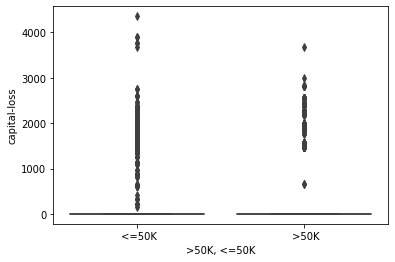

In [21]:
# Show distribution of capitol loss for earnings above and below 50K a year
sns.boxplot(x='>50K, <=50K',y='capital-loss',data=cleands)

People who earn less than 50K a year have a much larger distribution of capitol loss, the concentrated values are similar or lower than people who earn over 50K per year.

In [22]:
# Find the mximum values for the dataset grouped by 50K
grouped_ds = cleands.groupby('>50K, <=50K')

maximums = grouped_ds.max()
maximums

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
">50K, <=50K",,,,,,,,,,,,,,
<=50K,90,Without-pay,1484705,Some-college,16,Widowed,Transport-moving,Wife,White,Male,41310,4356,99,Yugoslavia
>50K,90,State-gov,1226583,Some-college,16,Widowed,Transport-moving,Wife,White,Male,99999,3683,99,Yugoslavia


From the max values we can gather:
    - That men earn more than women
    - That people in yugoslavia have long work weeks
    - That the capital gain for people who earn over 50K a year is far     greater.
    - That the capital loss for people who earn over 50K a year is less 

# Check eveness of dataset

In [23]:
K50_counts = cleands['>50K, <=50K'].value_counts()
K50_counts

 <=50K    22654
 >50K      7508
Name: >50K, <=50K, dtype: int64

In [24]:
K50_percentage = cleands['>50K, <=50K'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
K50_percentage

 <=50K    75.1%
 >50K     24.9%
Name: >50K, <=50K, dtype: object

The data is not distributed evenly over the target column and it will affect the accuracy of predictive models.

# Encode categorical columns to numeric values

In [25]:
eds=cleands

In [26]:
eds.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       '>50K, <=50K'],
      dtype='object')

In [27]:
eds.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
>50K, <=50K       object
dtype: object

In [28]:
# Change categorical data to numerical data for 2 categoriacl columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['workclass', 'education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country',
       '>50K, <=50K']
for col in cols:
    eds[col] = le.fit_transform(eds[col])

In [29]:
eds.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,">50K, <=50K"
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


# Check correlation after encoding

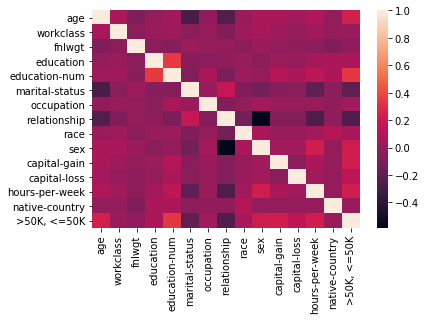

In [30]:
dscor=eds.corr()
sns.heatmap(dscor)

The field that correlates best with the 50K column is:
    education number 
After that the best correlated colums for the target column are:
    hours per week
    capital gain
    sex
    age


# Drop irrelevant columns

In [31]:
eds.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       '>50K, <=50K'],
      dtype='object')

education number 
After that the best correlated colums for the target column are:
    hours per week
    capital gain
    sex
    age

In [32]:
# Not chosen model performs best with all the columns included
nds=eds

# Find and remove outliers

In [33]:
nds.shape

(30162, 15)

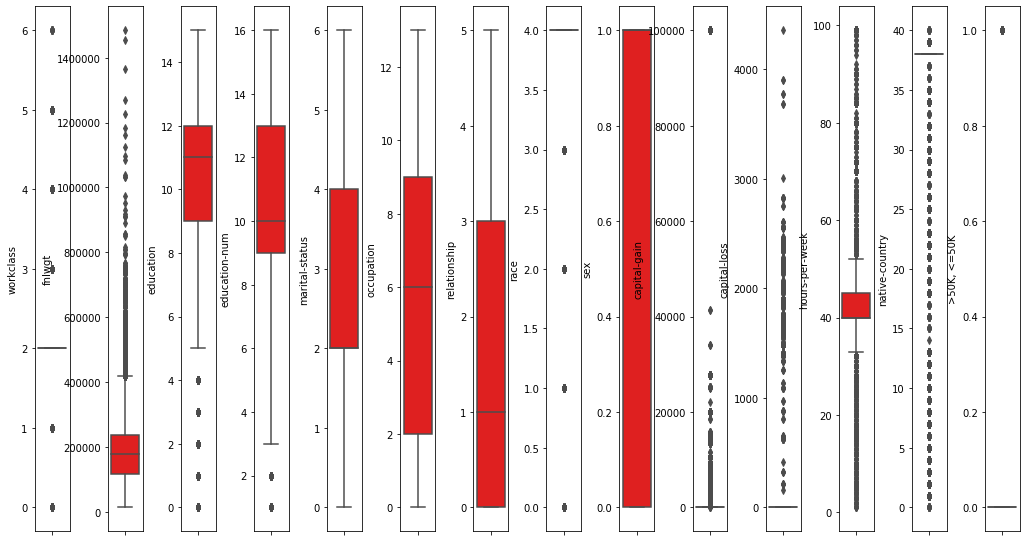

In [34]:
# Show boxplots for all columns, check outliers
collist=nds.columns.values
ncol=15
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(nds[collist[i]], color='red', orient='v')
    plt.tight_layout()

In [49]:
# Remove outliers - dataset renamed to cds (clean dataset)
from scipy import stats
from scipy.stats import zscore

z_score=abs(zscore(nds))
print(nds.shape)
cds=nds.loc[(z_score<3).all(axis=1)]
print(cds.shape)

(30162, 15)
(25760, 15)


In [50]:
cds.skew()

age                0.443408
workclass          1.184029
fnlwgt             0.627909
education         -0.965877
education-num     -0.135247
marital-status    -0.039663
occupation         0.122640
relationship       0.788082
race              -2.641907
sex               -0.719910
capital-gain       4.843972
capital-loss      28.905740
hours-per-week    -0.285633
native-country    -5.337237
>50K, <=50K        1.269713
dtype: float64

Cannot adjust skewness because then the classification models won't run.

# Split data into x and y

In [51]:
cds.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       '>50K, <=50K'],
      dtype='object')

In [52]:
# Lineup target and input values
x=cds.drop(columns=['>50K, <=50K'])
y=cds[['>50K, <=50K']]

Skewness treatments and scaler had noeffect on the best model or affected it poorly and so were left out.

# Train-Test split

In [53]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=55, test_size=0.20)

# Model

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100,random_state=42)#100 is defualt
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8534549689440993
[[3671  269]
 [ 486  726]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      3940
           1       0.73      0.60      0.66      1212

    accuracy                           0.85      5152
   macro avg       0.81      0.77      0.78      5152
weighted avg       0.85      0.85      0.85      5152



In [58]:
from sklearn.ensemble import AdaBoostClassifier
# AdaBoostClassifier(base_estimator=DecisionTreeClassifier()
#,n_estimators=50,Learning_rate=1.0)
ad= AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8606366459627329
[[3735  205]
 [ 513  699]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3940
           1       0.77      0.58      0.66      1212

    accuracy                           0.86      5152
   macro avg       0.83      0.76      0.79      5152
weighted avg       0.85      0.86      0.85      5152



# Check best parameters for models

In [59]:
# best parameters for logistic Regression

from sklearn.model_selection import GridSearchCV
lg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'penalty': 'l2'}

In [60]:
# Best parameters for DecisionTree

dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dt,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}

In [61]:
# Best parameters for KNeighborsRegressor

kn=KNeighborsClassifier()
parameters={'n_neighbors':(1,9)}
gd=GridSearchCV(kn,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 9}

# Logistic Regression and binary classification methods

In [62]:
KNN=KNeighborsClassifier(n_neighbors= 9)

LR=LogisticRegression(penalty= 'l2')
DT=DecisionTreeClassifier(criterion='entropy')# check random_state?
GNB=GaussianNB()

In [63]:
models=[]
models.append(('KneighborsClassifier',KNN))

models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

************************* KneighborsClassifier *************************

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')



Accuracy score = 0.7876552795031055


cross validation score = 0.791692546583851


roc_auc_score =  0.586955319897472


classification_report
               precision    recall  f1-score   support

           0       0.80      0.97      0.87      3940
           1       0.65      0.21      0.32      1212

    accuracy                           0.79      5152
   macro avg       0.73      0.59      0.59      5152
weighted avg       0.76      0.79      0.74      5152



[[3806  134]
 [ 960  252]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************************* LogisticRegression *************************

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, 

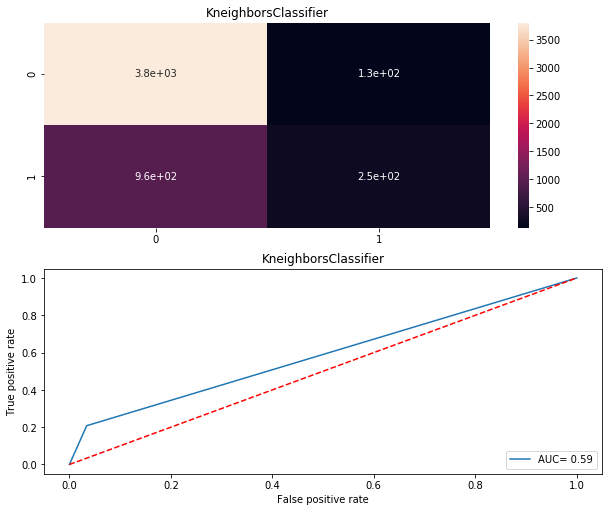

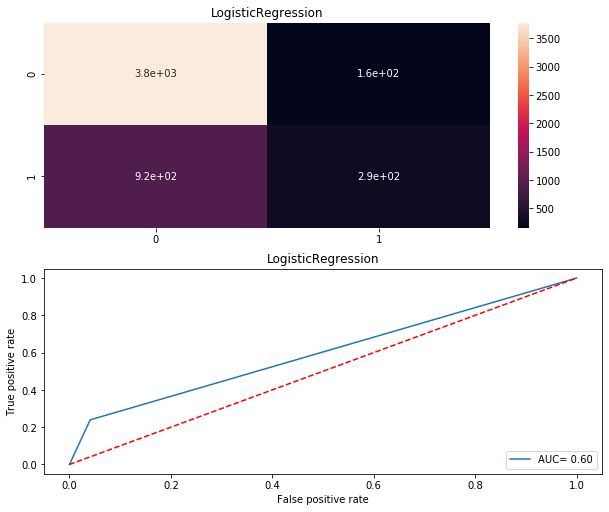

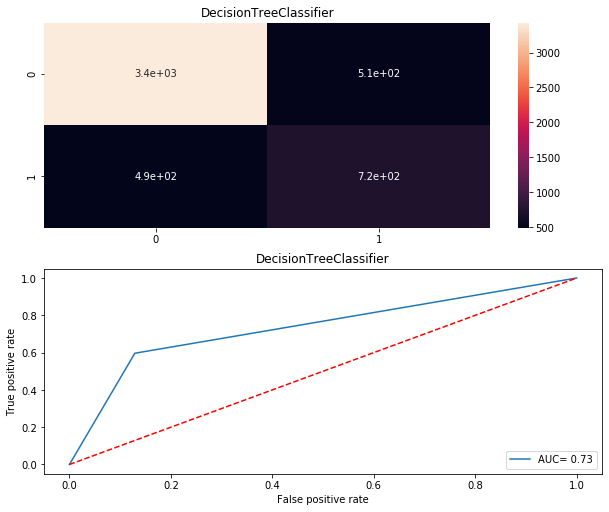

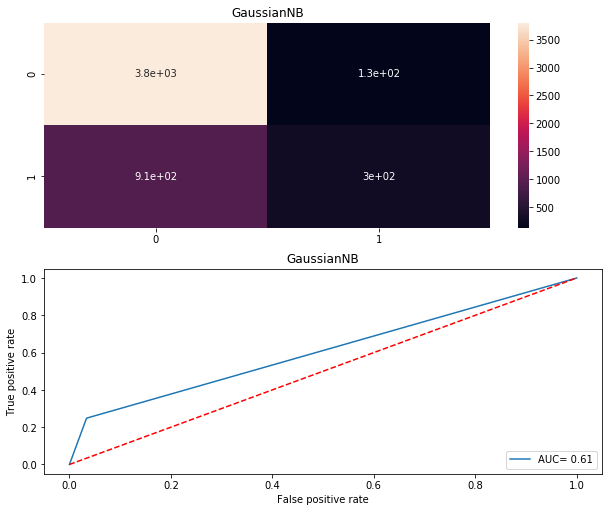

In [64]:
model_list=[]
score=[]
cvs=[]
rocscore=[]

for name, model in models:
    print('*************************',name,'*************************',end='\n\n')
   
    model_list.append(name)
    model.fit(x_train,y_train)
    print(model,end='\n\n')
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score =',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y, cv=10, scoring='accuracy').mean()
    print('cross validation score =',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC= %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    print('\n\n')

In [65]:
result=pd.DataFrame({'Model': model_list, 'Accuracy_score': score, 'Cross_val_score':cvs,'Roc_auc_score': rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_score
0,KneighborsClassifier,78.765528,79.169255,58.695532
1,LogisticRegression,78.979037,79.549689,59.920549
2,DecisionTreeClassifier,80.648292,80.454193,73.380032
3,GaussianNB,79.736025,79.607919,60.729674


I choose the Adaboost model as my final model because it gives the best scores.

Accuracy score 86.1
Precision      88.0
Recall         95.0



# Save the model

In [66]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(ad,'Adult.pkl')

['Adult.pkl']

In [67]:
# Load and use model to make a prediction
model=joblib.load('Adult.pkl')
model.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0])